In [2]:
import pandas as pd
import talib
import datetime

## Read data

In [3]:
def get_coin_path(coin, usd='USDT', time='1h'):
    if time == 'Daily':
        time = 'd'
    elif time == 'Minute':
        time = 'minute'
    else:
        time = '1h'
    return f"../data/dfs/Binance_{coin}{usd}_{time}.csv"

def read_binance_data(coin):
    def to_date(date):
        try:
            return datetime.datetime.strptime(date, '%Y-%m-%d %I-%p')
        except:
            return datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

    path = get_coin_path(coin)
    df = pd.read_csv(path, skiprows=1).iloc[::-1]
    df.reset_index(inplace=True, drop=True)
    df['date'] = df['date'].apply(lambda x: to_date(x))
    return df

In [4]:
df = read_binance_data("ETH")

## talib Pattrens

In [5]:
patt = """CDL2CROWS            Two Crows
CDL3BLACKCROWS       Three Black Crows
CDL3INSIDE           Three Inside Up/Down
CDL3LINESTRIKE       Three-Line Strike
CDL3OUTSIDE          Three Outside Up/Down
CDL3STARSINSOUTH     Three Stars In The South
CDL3WHITESOLDIERS    Three Advancing White Soldiers
CDLABANDONEDBABY     Abandoned Baby
CDLADVANCEBLOCK      Advance Block
CDLBELTHOLD          Belt-hold
CDLBREAKAWAY         Breakaway
CDLCLOSINGMARUBOZU   Closing Marubozu
CDLCONCEALBABYSWALL  Concealing Baby Swallow
CDLCOUNTERATTACK     Counterattack
CDLDARKCLOUDCOVER    Dark Cloud Cover
CDLDOJI              Doji
CDLDOJISTAR          Doji Star
CDLDRAGONFLYDOJI     Dragonfly Doji
CDLENGULFING         Engulfing Pattern
CDLEVENINGDOJISTAR   Evening Doji Star
CDLEVENINGSTAR       Evening Star
CDLGAPSIDESIDEWHITE  Up/Down-gap side-by-side white lines
CDLGRAVESTONEDOJI    Gravestone Doji
CDLHAMMER            Hammer
CDLHANGINGMAN        Hanging Man
CDLHARAMI            Harami Pattern
CDLHARAMICROSS       Harami Cross Pattern
CDLHIGHWAVE          High-Wave Candle
CDLHIKKAKE           Hikkake Pattern
CDLHIKKAKEMOD        Modified Hikkake Pattern
CDLHOMINGPIGEON      Homing Pigeon
CDLIDENTICAL3CROWS   Identical Three Crows
CDLINNECK            In-Neck Pattern
CDLINVERTEDHAMMER    Inverted Hammer
CDLKICKING           Kicking
CDLKICKINGBYLENGTH   Kicking - bull/bear determined by the longer marubozu
CDLLADDERBOTTOM      Ladder Bottom
CDLLONGLEGGEDDOJI    Long Legged Doji
CDLLONGLINE          Long Line Candle
CDLMARUBOZU          Marubozu
CDLMATCHINGLOW       Matching Low
CDLMATHOLD           Mat Hold
CDLMORNINGDOJISTAR   Morning Doji Star
CDLMORNINGSTAR       Morning Star
CDLONNECK            On-Neck Pattern
CDLPIERCING          Piercing Pattern
CDLRICKSHAWMAN       Rickshaw Man
CDLRISEFALL3METHODS  Rising/Falling Three Methods
CDLSEPARATINGLINES   Separating Lines
CDLSHOOTINGSTAR      Shooting Star
CDLSHORTLINE         Short Line Candle
CDLSPINNINGTOP       Spinning Top
CDLSTALLEDPATTERN    Stalled Pattern
CDLSTICKSANDWICH     Stick Sandwich
CDLTAKURI            Takuri (Dragonfly Doji with very long lower shadow)
CDLTASUKIGAP         Tasuki Gap
CDLTHRUSTING         Thrusting Pattern
CDLTRISTAR           Tristar Pattern
CDLUNIQUE3RIVER      Unique 3 River
CDLUPSIDEGAP2CROWS   Upside Gap Two Crows
CDLXSIDEGAP3METHODS  Upside/Downside Gap Three Methods"""
patt_list = [x.split(' ')[0] for x in patt.split('\n')]

In [5]:
patt_list[:5]

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE']

In [ ]:
#method(open, high, low, close)

In [7]:
cdl2 =talib.CDL3LINESTRIKE(df["open"],df["high"],df["low"],df["close"])

In [9]:
cdl2[cdl2 > 0]

4535     100
6574     100
31718    100
31751    100
32008    100
32279    100
33112    100
33208    100
33732    100
34369    100
34553    100
35109    100
35380    100
35388    100
35641    100
36279    100
37141    100
37768    100
38468    100
38523    100
38877    100
39037    100
39068    100
dtype: int32

In [6]:
df.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
0,1.502942e+09,2017-08-17 04:00:00,ETH/USDT,652.74,652.74,298.0,300.79,122.52,36736.84,NaN
1,1.502946e+09,2017-08-17 05:00:00,ETH/USDT,301.61,303.28,300.0,303.10,377.67,114043.28,NaN
2,1.502950e+09,2017-08-17 06:00:00,ETH/USDT,303.10,304.44,301.9,302.68,302.51,91622.68,NaN
3,1.502953e+09,2017-08-17 07:00:00,ETH/USDT,302.68,307.96,302.6,307.96,753.19,229248.31,NaN
4,1.502957e+09,2017-08-17 08:00:00,ETH/USDT,307.96,309.97,307.0,308.62,150.75,46559.46,NaN


In [7]:
import numpy as np

### pattern ranking

In [6]:
df = read_binance_data("ETH")
for pattern in patt_list:
    func = eval(f"talib.{pattern}")
    df[pattern] = func(df["open"],df["high"],df["low"],df["close"])

In [9]:
df.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
0,1.502942e+09,2017-08-17 04:00:00,ETH/USDT,652.74,652.74,298.0,300.79,122.52,36736.84,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.502946e+09,2017-08-17 05:00:00,ETH/USDT,301.61,303.28,300.0,303.10,377.67,114043.28,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1.502950e+09,2017-08-17 06:00:00,ETH/USDT,303.10,304.44,301.9,302.68,302.51,91622.68,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1.502953e+09,2017-08-17 07:00:00,ETH/USDT,302.68,307.96,302.6,307.96,753.19,229248.31,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1.502957e+09,2017-08-17 08:00:00,ETH/USDT,307.96,309.97,307.0,308.62,150.75,46559.46,NaN,...,0,0,0,0,0,0,0,0,0,0


In [14]:
len(df[df["CDLSPINNINGTOP"] < 0])

4768

In [10]:
#t+ trend up
#t- trend down
#s sucess
#f failure

pattern_dict = {pattern:{"t+":0,"t-":0,"s":0,"f":0} for pattern in patt_list}

In [11]:
for p in patt_list:
    pattern_dict[p]["t+"] = len(df[df[p]>0])
    pattern_dict[p]["t-"] = len(df[df[p]<0])
    

1    True
2    True
3    True
Name: high, dtype: bool

In [13]:
# 7h | high rule
h = 7
for pattern in patt_list:
    print(pattern)
    for i in range(len(df) - h):
        data = df.iloc[i]
        if data[pattern] > 0:
            if any(df.iloc[i+1:i+h]["high"] > data["close"]):
                pattern_dict[pattern]["s"] +=1
            else:
                pattern_dict[pattern]["f"] +=1
        
                
        

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK


KeyboardInterrupt: 

In [22]:
pattern_dict

{'CDL2CROWS': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDL3BLACKCROWS': {'t+': 0, 't-': 1, 's': 0, 'f': 0},
 'CDL3INSIDE': {'t+': 48, 't-': 34, 's': 47, 'f': 1},
 'CDL3LINESTRIKE': {'t+': 23, 't-': 16, 's': 23, 'f': 0},
 'CDL3OUTSIDE': {'t+': 188, 't-': 179, 's': 185, 'f': 2},
 'CDL3STARSINSOUTH': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDL3WHITESOLDIERS': {'t+': 17, 't-': 0, 's': 17, 'f': 0},
 'CDLABANDONEDBABY': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLADVANCEBLOCK': {'t+': 0, 't-': 418, 's': 0, 'f': 0},
 'CDLBELTHOLD': {'t+': 3200, 't-': 3031, 's': 3170, 'f': 30},
 'CDLBREAKAWAY': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLCLOSINGMARUBOZU': {'t+': 2266, 't-': 1710, 's': 2233, 'f': 32},
 'CDLCONCEALBABYSWALL': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLCOUNTERATTACK': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLDARKCLOUDCOVER': {'t+': 0, 't-': 1, 's': 0, 'f': 0},
 'CDLDOJI': {'t+': 6384, 't-': 0, 's': 6253, 'f': 131},
 'CDLDOJISTAR': {'t+': 41, 't-': 50, 's': 41, 'f': 0},
 'CDLDRAGONFLYDOJI': {'

In [23]:
patt_df = pd.DataFrame.from_dict(pattern_dict,orient='index')

In [24]:
patt_df.head()

,t+,t-,s,f
CDL2CROWS,0,0,0,0
CDL3BLACKCROWS,0,1,0,0
CDL3INSIDE,48,34,47,1
CDL3LINESTRIKE,23,16,23,0
CDL3OUTSIDE,188,179,185,2


In [25]:
patt_df["score"] = patt_df["s"]/(patt_df["f"] + patt_df["s"] + 1) 

In [30]:
patt_df[patt_df["s"] > 10].sort_values(["f"],ascending=False)

,t+,t-,s,f,score
CDLDOJI,6384,0,6253,131,0.979327
CDLSHORTLINE,3706,3147,3603,102,0.972207
CDLLONGLEGGEDDOJI,6284,0,6205,79,0.987271
CDLRICKSHAWMAN,4669,0,4610,59,0.987152
CDLSPINNINGTOP,4897,4768,4837,59,0.987748
CDLLONGLINE,3671,3143,3633,38,0.989379
CDLHIGHWAVE,2863,2769,2827,36,0.987081
CDLCLOSINGMARUBOZU,2266,1710,2233,32,0.985437
CDLBELTHOLD,3200,3031,3170,30,0.990316
CDLHIKKAKE,2807,3070,2785,22,0.991809


In [26]:
top_10 = patt_df[patt_df["s"] > 10].sort_values(["f"],ascending=True).head(10).index.values

In [28]:
patt_df["score"].head(30)

CDL2CROWS              0.000000
CDL3BLACKCROWS         0.000000
CDL3INSIDE             0.959184
CDL3LINESTRIKE         0.958333
CDL3OUTSIDE            0.984043
CDL3STARSINSOUTH       0.000000
CDL3WHITESOLDIERS      0.944444
CDLABANDONEDBABY       0.000000
CDLADVANCEBLOCK        0.000000
CDLBELTHOLD            0.990316
CDLBREAKAWAY           0.000000
CDLCLOSINGMARUBOZU     0.985437
CDLCONCEALBABYSWALL    0.000000
CDLCOUNTERATTACK       0.000000
CDLDARKCLOUDCOVER      0.000000
CDLDOJI                0.979327
CDLDOJISTAR            0.976190
CDLDRAGONFLYDOJI       0.982323
CDLENGULFING           0.997253
CDLEVENINGDOJISTAR     0.000000
CDLEVENINGSTAR         0.000000
CDLGAPSIDESIDEWHITE    0.909091
CDLGRAVESTONEDOJI      0.991537
CDLHAMMER              0.985830
CDLHANGINGMAN          0.000000
CDLHARAMI              0.984536
CDLHARAMICROSS         0.934783
CDLHIGHWAVE            0.987081
CDLHIKKAKE             0.991809
CDLHIKKAKEMOD          0.960000
Name: score, dtype: float64

#### pct rule

In [8]:
# 3h | high rule | pct
H = 7
PCT = 0.015
pattern_dict2 = {pattern:{"t+":0,"t-":0,"s":0,"f":0} for pattern in patt_list}
for p in patt_list:
    pattern_dict2[p]["t+"] = len(df[df[p]>0])
    pattern_dict2[p]["t-"] = len(df[df[p]<0])
    
for pattern in patt_list:
    print(pattern)
    for i in range(len(df)-H):
        data = df.iloc[i]
        if data[pattern] > 0:
            if any(df.iloc[i:i+H]["high"] > data["close"] + data["close"] * PCT):
                pattern_dict2[pattern]["s"] +=1
            else:
                pattern_dict2[pattern]["f"] +=1

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS


In [9]:
pattern_dict2

{'CDL2CROWS': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDL3BLACKCROWS': {'t+': 0, 't-': 1, 's': 0, 'f': 0},
 'CDL3INSIDE': {'t+': 48, 't-': 34, 's': 26, 'f': 22},
 'CDL3LINESTRIKE': {'t+': 23, 't-': 16, 's': 19, 'f': 4},
 'CDL3OUTSIDE': {'t+': 188, 't-': 179, 's': 97, 'f': 90},
 'CDL3STARSINSOUTH': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDL3WHITESOLDIERS': {'t+': 17, 't-': 0, 's': 3, 'f': 14},
 'CDLABANDONEDBABY': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLADVANCEBLOCK': {'t+': 0, 't-': 418, 's': 0, 'f': 0},
 'CDLBELTHOLD': {'t+': 3200, 't-': 3031, 's': 1316, 'f': 1884},
 'CDLBREAKAWAY': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLCLOSINGMARUBOZU': {'t+': 2266, 't-': 1710, 's': 921, 'f': 1344},
 'CDLCONCEALBABYSWALL': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLCOUNTERATTACK': {'t+': 0, 't-': 0, 's': 0, 'f': 0},
 'CDLDARKCLOUDCOVER': {'t+': 0, 't-': 1, 's': 0, 'f': 0},
 'CDLDOJI': {'t+': 6384, 't-': 0, 's': 2502, 'f': 3881},
 'CDLDOJISTAR': {'t+': 41, 't-': 50, 's': 21, 'f': 20},
 'CDLDRAGONFLYDOJ

In [13]:
patt_df2 = pd.DataFrame.from_dict(pattern_dict2,orient='index')

In [14]:
patt_df2["score"] = patt_df2["s"]/patt_df2["t+"]

In [16]:
patt_df2[patt_df2["t+"] > 5].sort_values(["score"],ascending=False)

,t+,t-,s,f,score
CDL3LINESTRIKE,23,16,19,4,0.826087
CDLINVERTEDHAMMER,30,0,20,10,0.666667
CDLXSIDEGAP3METHODS,40,38,26,14,0.650000
CDLGAPSIDESIDEWHITE,10,0,6,4,0.600000
CDLMORNINGSTAR,29,0,17,12,0.586207
CDLHARAMI,193,190,105,88,0.544041
CDL3INSIDE,48,34,26,22,0.541667
CDL3OUTSIDE,188,179,97,90,0.515957
CDLDOJISTAR,41,50,21,20,0.512195
CDLHARAMICROSS,45,54,23,22,0.511111


In [15]:
top_10 = patt_df2[patt_df2["t+"] > 5].sort_values(["score"],ascending=False)

In [26]:
list(top_10)

['CDL3LINESTRIKE',
 'CDLINVERTEDHAMMER',
 'CDLXSIDEGAP3METHODS',
 'CDLGAPSIDESIDEWHITE']

In [38]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [33]:
df.set_index('date',inplace=True)

In [82]:
index = df.index[50]

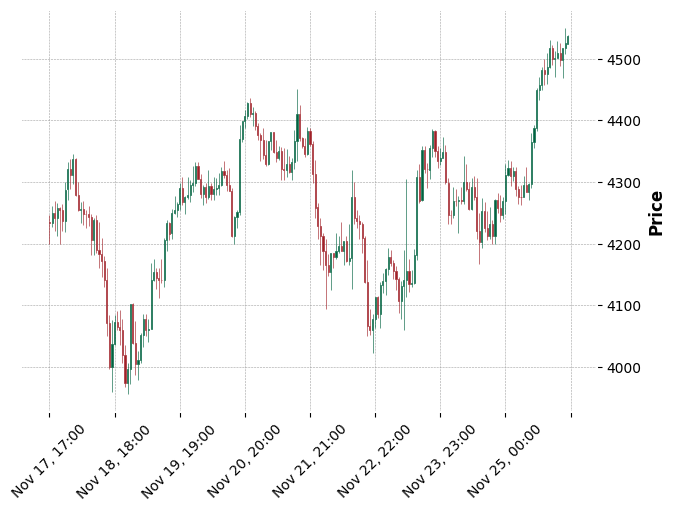

TypeError: Expect data as DataFrame

In [117]:
mpf.plot(df.iloc[-200:],type='candle',style="charles")
mpf.plot(df.iloc[-200:]["CDLLONGLEGGEDDOJI"])

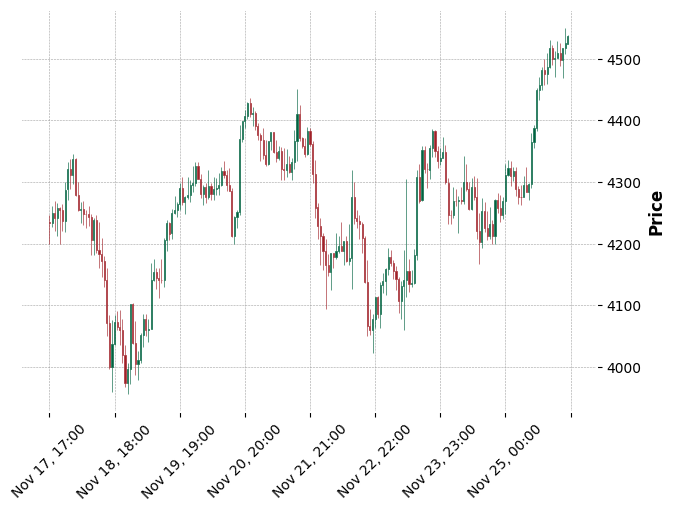

In [97]:
fig = mpf.plot(df.iloc[-200:],type='candle',style="charles")

In [110]:
s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 6})
fig = mpf.figure(figsize=(10, 7), style=s)

<Mpf_Figure size 1000x700 with 0 Axes>

In [111]:
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

In [112]:
mpf.plot(df, type='candle', ax=ax1)
plt.show()

/home/ashraf/Desktop/python-env/crypto/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


In [85]:
vals = talib.CDL3INSIDE(df["open"],df["high"],df["low"],df["close"])
vals[vals > 199]

Series([], dtype: int32)

In [97]:
df["high"]

0         652.74
1         303.28
2         304.44
3         307.96
4         309.97
          ...   
40107    4528.98
40108    4526.00
40109    4517.46
40110    4550.00
40111    4537.97
Name: high, Length: 40112, dtype: float64

In [101]:
df.loc[0:10]["high"]

0     652.74
1     303.28
2     304.44
3     307.96
4     309.97
5     312.00
6     310.97
7     310.68
8     310.51
9     309.72
10    309.40
Name: high, dtype: float64

### avg treds

In [159]:
H = 5
profit_pct = []
for i in range(len(df)-H):
    current = df.iloc[i]
    close_price = current["close"]
    forword = df.iloc[i+1:i+H]
    high_price = max(forword["close"])
    pct = (high_price - close_price)/close_price
    profit_pct.append(pct)
    
    

In [151]:
np.mean(profit_pct)

0.00782809516930695

In [152]:
import matplotlib.pyplot as plt

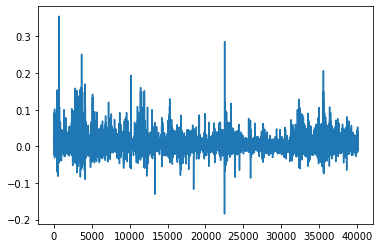

In [153]:
plt.plot(profit_pct)

In [160]:
len([pct for pct in profit_pct  if pct >= 0.015])/len(profit_pct)

0.20248335701997158

In [161]:
profit_pct2 =profit_pct

In [162]:
for i in range(len(profit_pct2)):
    if profit_pct2[i] < 0.015:
        profit_pct2[i] = np.nan
        

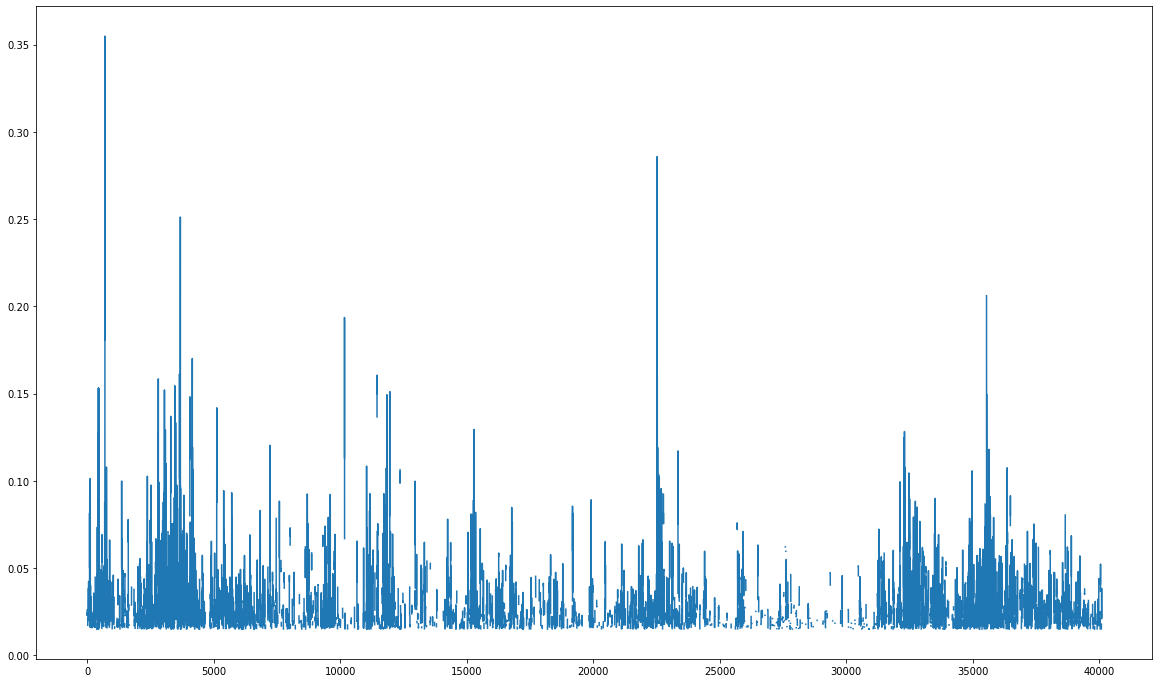

In [163]:
plt.figure(figsize=(20,12))
plt.plot(profit_pct2)

In [166]:
np.nanmean(profit_pct2)

0.031001894581865384

<BarContainer object of 40107 artists>

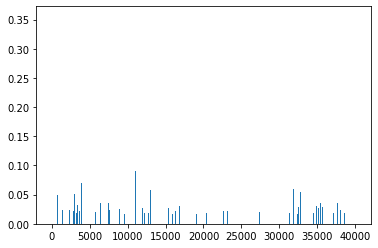

In [170]:
plt.bar(list(range(0,len(profit_pct2))),profit_pct2)

In [ ]:
profit_pct2

In [172]:
df["high-close"] = (df["high"] - df["close"])/df["close"]

In [175]:
np.mean(df["high-close"])

0.007204747318080284